In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Cleaning

In [2]:
df = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='latin-1', dtype={"Customer Zipcode": str})
df.loc[390]

Type                                                                 TRANSFER
Days for shipping (real)                                                    5
Days for shipment (scheduled)                                               4
Benefit per order                                                  146.139999
Sales per customer                                                     298.25
Delivery Status                                                 Late delivery
Late_delivery_risk                                                          1
Category Id                                                                73
Category Name                                                  Sporting Goods
Customer City                                                      Rio Grande
Customer Country                                                  Puerto Rico
Customer Email                                                      XXXXXXXXX
Customer Fname                                                  

In [66]:
# clean out columns and rows with NA
df.drop(columns=['Product Description', 'Order Zipcode'], inplace=True)
df.drop(df[ df['Customer Zipcode'].isna() ].index, inplace=True)


# Remove columns that do not have information for the model
'''
- Customer email (Personal Information)
- Customer Fname (Personal Information)
#### - Customer Id (Personal Information)
- Customer Lname (Personal Information)
- Customer Password (Personal Information)
- Customer Street (feel there is no way to actually extract some information from this, but there might be a way)
- Category Id (repeated values as Product Category Id)
- Order Customer Id (repeated values with Customer Id)
- Benefit per order (repeated values with Order Profit Per Order)
- Sales per customer (repeated values with Order Item Total)
- Order Item Product Price (repeated values with Product Price)
- Order Item Cardprod Id (repeated values with Product Card Id)
- Product Image (links with images)
- Product Status (everything is 0)
- Order Item Id (it is like an index that goes from 1 to the len of the dataset)
'''

df.drop(columns=[
    "Customer Email","Customer Fname","Customer Lname","Customer Password","Customer Street",
    "Category Id","Order Customer Id","Benefit per order","Sales per customer","Order Item Product Price",
    "Order Item Cardprod Id","Product Image","Product Status","Order Item Id"
], inplace=True)
df.loc[390]

Type                                    TRANSFER
Days for shipping (real)                       5
Days for shipment (scheduled)                  4
Delivery Status                    Late delivery
Late_delivery_risk                             1
Category Name                     Sporting Goods
Customer City                         Rio Grande
Customer Country                     Puerto Rico
Customer Id                                19417
Customer Segment                     Home Office
Customer State                                PR
Customer Zipcode                             745
Department Id                                  2
Department Name                          Fitness
Latitude                               42.256458
Longitude                             -83.416885
Market                              Pacific Asia
Order City                             Toowoomba
Order Country                          Australia
order date (DateOrders)          1/12/2018 10:11
Order Id            

In [67]:
# Make sure we don't have any NAs in our dataframe
cols = df.columns[df.isna().sum() > 0].values
df[cols].isna().sum()

Series([], dtype: float64)

In [68]:
df.groupby("Order Id")["Product Card Id"].count().sort_values(ascending=False)

Order Id
39433    5
42199    5
42262    5
42258    5
42246    5
        ..
43760    1
43759    1
43750    1
43742    1
77204    1
Name: Product Card Id, Length: 65749, dtype: int64

In [69]:
df[ df["Order Id"] == 2407][["Order Id", "order date (DateOrders)", "Customer City", "Order City", "Order Item Profit Ratio", "Order Item Quantity"]]

,Order Id,order date (DateOrders),Customer City,Order City,Order Item Profit Ratio,Order Item Quantity
110108,2407,2/5/2015 2:55,Meridian,San Francisco de Macorís,0.30,1
110148,2407,2/5/2015 2:55,Meridian,San Francisco de Macorís,0.31,1
114237,2407,2/5/2015 2:55,Meridian,San Francisco de Macorís,0.28,3
116397,2407,2/5/2015 2:55,Meridian,San Francisco de Macorís,0.08,2
116419,2407,2/5/2015 2:55,Meridian,San Francisco de Macorís,-2.60,2


1939.98999
7.489999771


<Axes: >

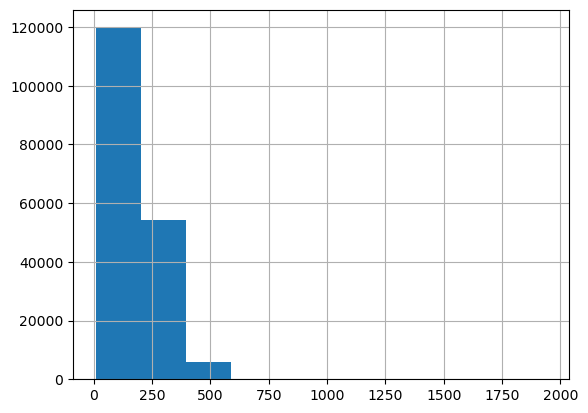

In [70]:
col_name = 'Order Item Total'
print(df[col_name].max())
print(df[col_name].min())
df[col_name].hist()

In [73]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode'],
      dtype='object')

In [75]:
df.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,-249.089996,South Asia,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class
2,CASH,4,4,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,-247.779999,South Asia,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,22.860001,Oceania,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,134.210007,Oceania,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class


In [218]:
df[[
    # 'Customer State', 'Customer Zipcode', 'Department Id',
    # 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
    # 'Order Country', 'order date (DateOrders)', 
    'Order Id',
    'Order Item Discount', 'Order Item Discount Rate',
    'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
    'Order Item Total', 'Order Profit Per Order', 'Order Region',
    'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
    'Product Name', 'Product Price',
    'Shipping Mode']][40:50]

,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode
40,75900,29.500000,0.09,0.48,1,327.750000,298.250000,143.160004,Southeast Asia,Singapur,PENDING_PAYMENT,1360,73,Smart watch,327.750000,Same Day
41,75899,32.779999,0.10,0.46,1,327.750000,294.980011,135.690002,Southeast Asia,Singapur,COMPLETE,1360,73,Smart watch,327.750000,Same Day
42,75898,39.330002,0.12,0.46,1,327.750000,288.420013,132.669998,Southeast Asia,Sumatra Septentrional,CLOSED,1360,73,Smart watch,327.750000,Standard Class
43,75897,42.610001,0.13,0.42,1,327.750000,285.140015,119.760002,Southeast Asia,Sumatra Septentrional,PENDING_PAYMENT,1360,73,Smart watch,327.750000,Standard Class
44,75896,49.160000,0.15,0.11,1,327.750000,278.589996,31.480000,Oceania,Territorio de la Capital Australiana,COMPLETE,1360,73,Smart watch,327.750000,Standard Class
45,75895,52.439999,0.16,0.31,1,327.750000,275.309998,86.169998,South Asia,Karnataka,PENDING,1360,73,Smart watch,327.750000,Standard Class
46,75894,55.720001,0.17,0.48,1,327.750000,272.029999,130.580002,South Asia,Karnataka,PENDING,1360,73,Smart watch,327.750000,Second Class
47,75893,59.000000,0.18,0.00,1,327.750000,268.760010,0.000000,Eastern Asia,Zhejiang,PROCESSING,1360,73,Smart watch,327.750000,Standard Class
48,28744,4.800000,0.04,-0.27,2,119.980003,115.180000,-30.750000,South Asia,Uttar Pradesh,PENDING_PAYMENT,365,17,Perfect Fitness Perfect Rip Deck,59.990002,Second Class
49,45461,0.800000,0.01,-1.55,2,79.980003,79.180000,-122.730003,West Asia,Bursa,PENDING_PAYMENT,627,29,Under Armour Girls' Toddler Spine Surge Runni,39.990002,Second Class


In [77]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Id', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode'],
      dtype='object')

### Data Preparation and Transformation

*Columns we need to remove*
- Late delivery risk: (all of these columns do indeed have a late delivery, going to give us trash results)
- shipping date (DateOrders) that has information of when it's shipped and we don't know that at time of prediction
- If we go with delivery status drop days for shipping (real), if we go with Days for shipping (real) then Delivery Status


*Calculations*
- Number of previous orders
  - For customer
  - For that day
- Add a variable for hour of day
- Add a variable for weekday
- Add a variable for month
- Add a variable for day of year
- Add a variable for is weekend
- Total Order Quantity (number of items ordered in that order)
- Total Order Sales ($$ earn in that order)


In [210]:
# Add variables for monrh, weekday and hour of day
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"])
df["order month"] = df["order date (DateOrders)"].dt.month
df["order weekday"] = df["order date (DateOrders)"].dt.weekday
df["order hour"] = df["order date (DateOrders)"].dt.hour
df["order day of year"] = df["order date (DateOrders)"].dt.day_of_year
df["order is weekend"] = df["order weekday"] > 4
df["order date"] = pd.to_datetime(df["order date (DateOrders)"].dt.date)

df[["order date (DateOrders)", "order month", "order weekday", "order hour", "order day of year", "order is weekend", "order date"]]

,order date (DateOrders),order month,order weekday,order hour,order day of year,order is weekend,order date
0,2018-01-31 22:56:00,1,2,22,31,False,2018-01-31
1,2018-01-13 12:27:00,1,5,12,13,True,2018-01-13
2,2018-01-13 12:06:00,1,5,12,13,True,2018-01-13
3,2018-01-13 11:45:00,1,5,11,13,True,2018-01-13
4,2018-01-13 11:24:00,1,5,11,13,True,2018-01-13
...,...,...,...,...,...,...,...
180514,2016-01-16 03:40:00,1,5,3,16,True,2016-01-16
180515,2016-01-16 01:34:00,1,5,1,16,True,2016-01-16
180516,2016-01-15 21:00:00,1,4,21,15,False,2016-01-15
180517,2016-01-15 20:18:00,1,4,20,15,False,2016-01-15


In [104]:
item_per_order_count = df.groupby("Order Id")["Order Item Quantity"].sum()
def get_order_item_cnt(order_id):
    return item_per_order_count[order_id]

df["total order qty"] = df["Order Id"].map(get_order_item_cnt)
df[df["Order Id"].isin([4,5])][["Order Id", "Customer Id", "Product Name", "Order Item Quantity", "total order qty"]]

,Order Id,Customer Id,Product Name,Order Item Quantity,total order qty
20305,5,11318,Nike Men's CJ Elite 2 TD Football Cleat,1,10
20680,5,11318,Diamondback Women's Serene Classic Comfort Bi,1,10
20695,5,11318,Diamondback Women's Serene Classic Comfort Bi,1,10
58046,5,11318,Perfect Fitness Perfect Rip Deck,5,10
63764,4,8827,Team Golf New England Patriots Putter Grip,2,14
95938,4,8827,Nike Men's Dri-FIT Victory Golf Polo,3,14
96131,4,8827,Perfect Fitness Perfect Rip Deck,5,14
114914,5,11318,O'Brien Men's Neoprene Life Vest,2,10
114915,4,8827,O'Brien Men's Neoprene Life Vest,4,14


In [222]:
total_sales_per_order = df.groupby("Order Id")["Sales"].sum()
def get_order_sales(order_id):
    return total_sales_per_order[order_id]

df["total order sales"] = df["Order Id"].map(get_order_sales)
df[df["Order Id"].isin([5,7])][["Order Id", "Customer Id", "Product Name", "Order Item Quantity", "total order qty", "total order sales"]]

,Order Id,Customer Id,Product Name,Order Item Quantity,total order qty,total order sales
20305,5,11318,Nike Men's CJ Elite 2 TD Football Cleat,1,10,1129.860039
20680,5,11318,Diamondback Women's Serene Classic Comfort Bi,1,10,1129.860039
20695,5,11318,Diamondback Women's Serene Classic Comfort Bi,1,10,1129.860039
58046,5,11318,Perfect Fitness Perfect Rip Deck,5,10,1129.860039
64753,7,4530,Diamondback Women's Serene Classic Comfort Bi,1,7,579.920013
77010,7,4530,Pelican Sunstream 100 Kayak,1,7,579.920013
81543,7,4530,Glove It Imperial Golf Towel,5,7,579.920013
114914,5,11318,O'Brien Men's Neoprene Life Vest,2,10,1129.860039


In [150]:
def get_previous_num_orders(order_date, customer_id):
    tmp = df[ df["order date (DateOrders)"] < order_date]
    tmp = tmp[ tmp["Customer Id"] == customer_id]["Order Id"].drop_duplicates()
    return len(tmp)

df["prev orders"] = df.apply(lambda row: get_previous_num_orders(row["order date (DateOrders)"], row["Customer Id"]), axis=1)

In [151]:
df[df["Customer Id"] == 5][["order date (DateOrders)", "Customer Id", "Order Id", "prev orders"]]

,order date (DateOrders),Customer Id,Order Id,prev orders
6717,2016-10-31 00:38:00,5,45832,2
11509,2016-06-16 09:24:00,5,36472,0
11510,2016-06-16 09:24:00,5,36472,0
11738,2016-06-16 09:24:00,5,36472,0
100469,2016-06-16 09:24:00,5,36472,0
100470,2016-06-16 09:24:00,5,36472,0
148349,2016-08-26 08:26:00,5,41333,1


In [152]:
# remove columns
df.drop(columns=["shipping date (DateOrders)", "Late_delivery_risk"], inplace=True)

In [202]:
def get_orders_for_the_day(order_date):
    return len(df[df["order date"] == order_date])

df["total orders in day"] = df["order date"].map(get_orders_for_the_day)

df[ df["order date"] == "2018-01-13"]["total orders in day"]

1        68
2        68
3        68
4        68
5        68
         ..
52418    68
52419    68
52420    68
52421    68
52422    68
Name: total orders in day, Length: 68, dtype: int64

In [224]:
df[ df["order date"] == "2018-01-31"]

,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,...,order month,order weekday,order hour,total order qty,prev orders,order date,total orders in day,order day of year,order is weekend,total order sales
0,DEBIT,3,4,Advance shipping,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,...,1,2,22,1,0,2018-01-31,68,31,False,327.750000
2189,DEBIT,5,4,Late delivery,Women's Clothing,Morristown,EE. UU.,20722,Corporate,NJ,...,1,2,11,1,0,2018-01-31,68,31,False,215.820007
2253,DEBIT,2,4,Advance shipping,Women's Clothing,Brooklyn,EE. UU.,20699,Corporate,NY,...,1,2,3,1,0,2018-01-31,68,31,False,215.820007
3560,DEBIT,4,2,Late delivery,Women's Clothing,Caguas,Puerto Rico,20706,Consumer,PR,...,1,2,5,1,0,2018-01-31,68,31,False,215.820007
3578,DEBIT,2,2,Shipping on time,Women's Clothing,Caguas,Puerto Rico,20719,Consumer,PR,...,1,2,10,1,0,2018-01-31,68,31,False,215.820007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163222,DEBIT,2,4,Advance shipping,Women's Clothing,Waukegan,EE. UU.,20724,Home Office,IL,...,1,2,12,1,0,2018-01-31,68,31,False,215.820007
168609,TRANSFER,2,1,Late delivery,Women's Clothing,Bronx,EE. UU.,20748,Home Office,NY,...,1,2,20,1,0,2018-01-31,68,31,False,215.820007
169492,TRANSFER,3,2,Late delivery,Women's Clothing,Phoenix,EE. UU.,20735,Home Office,AZ,...,1,2,15,1,0,2018-01-31,68,31,False,215.820007
170980,TRANSFER,3,4,Shipping canceled,Women's Clothing,Hialeah,EE. UU.,20730,Home Office,FL,...,1,2,14,1,0,2018-01-31,68,31,False,215.820007


In [223]:
df.to_csv("DataCoSupplyChain_cleanData.csv")

### Neural network

Need to remove additional info

*Columns useful for calculations but no for the model*
- Customer Id
- Department Id/Department Name (maybe drop Department Name, just make sure to take this as categorical) 
- Order Id
- Product Card Id/Product Name (maybe drop Product Name, just make sure to take this as categorical)
- Product Category Id/Category Name (maybe drop Category Name, same thing as above)
- all the other dates


*Defining predictors, and removing columns that have that information*
For the predictor we can have:
- Delivery Status, for this we can select to predict the three different cases, or do a binary with
- New column with calculation of = Days for shipping (real) - Days for shipment (scheduled), predict that number, or a 1 or 0
- Predict the column Days for shipping (real)

In [155]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [37]:
df_clean = pd.read_csv("DataCoSupplyChain_cleanData.csv", encoding='latin-1', dtype={"Customer Zipcode": str}, index_col=0)

## remove cols and dates from the df
df_clean.drop(columns=["order date (DateOrders)", "order date", "Customer Id", "Department Id", "Order Id", "Product Card Id", "Product Category Id"], inplace=True)

### Multiclass Classification - Delivery Status

Create a MLP classifier with 4 output for each one of the classes

In [ ]:
## Different X and y combinations
df_sample = df_clean.sample(frac=0.2)

# # Using delivery Status as predictor
X = df_sample.drop(columns=['Delivery Status', 'Days for shipping (real)', 'Order Status'])
y = df_sample["Delivery Status"]

# Store column names before transformation
all_columns = df_sample.drop(columns=['Delivery Status', 'Days for shipping (real)', 'Order Status']).columns


# Scale and handle categorical data
scaler = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), [
        'Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode',
        'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name',
        'Shipping Mode', 'order month', 'order weekday', 'order hour', 'order is weekend'
    ]),
    ('scale', StandardScaler(), [
        'Days for shipment (scheduled)', 'Latitude', 'Longitude', 'Order Item Discount', 'Sales', 'Order Item Total',
        'Order Profit Per Order', 'Product Price','total order sales', 'total orders in day', 'total order qty'
    ])
], remainder='passthrough')

# scaler = StandardScaler()
X = scaler.fit_transform(X)



# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9, stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=9)

Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from category_encoders import TargetEncoder
import pandas as pd


# Model Initialization (Ensemble methods)
rf_model = RandomForestClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# Define hyperparameters grid for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 0.5, 0.75],
    'max_samples': [0.5, 1.0]
}


param_grid_ab = {
    'n_estimators': [50, 100, 200,500,1000],
    'learning_rate': [1, 0.1, 0.01]
}


# Create GridSearchCV for each model
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_ab = GridSearchCV(ab_model, param_grid_ab, cv=5, scoring='accuracy')

# Fit the models with GridSearchCV
grid_rf.fit(X_train, y_train)
grid_ab.fit(X_train, y_train)

# Get best scores and best parameters
best_scores = {
    'Random Forest': grid_rf.best_score_,
    'AdaBoost': grid_ab.best_score_,
}

best_params = {
    'Random Forest': grid_rf.best_params_,
    'AdaBoost': grid_ab.best_params_,
}

# Display best scores and best parameters
print("Best Scores:")
for model, score in best_scores.items():
    print(f"{model}: {score:.4f}")

print("\nBest Parameters:")
for model, params in best_params.items():
    print(f"{model}: {params}")


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

classifiers = {
    'Random Forest': grid_rf.best_estimator_,
    'AdaBoost': grid_ab.best_estimator_
}

for clf_name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()


In [ ]:
# Get feature importances
feature_importances = {
    'Random Forest': grid_rf.best_estimator_.feature_importances_,
    'AdaBoost': grid_ab.best_estimator_.feature_importances_
}

plt.figure(figsize=(12, 6))
for clf_name, importances in feature_importances.items():
    plt.figure()
    sorted_indices = importances.argsort()[::-1][:10]  # Top 10 important features
    plt.barh(range(10), importances[sorted_indices], align='center')
    plt.yticks(range(10), X.columns[sorted_indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Feature Importances for {clf_name}')
    plt.show()


SVM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

def search_best_svm(kernel, C_search_space, random_state):
    best_score = -np.inf
    for C in C_search_space:
        # Initialize an SVM classifier with the specified kernel type, C value, and random state
        ### START CODE ###
        svm_classifier = SVC(kernel=kernel, C=C, random_state=random_state)
        ### END CODE ###

        # Evaluate accuracy scores using 5-fold cross-validation scores
        ### START CODE ###
        cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
        ### END CODE ###

        # Compute the average score and compare with the current best score to update the best C
        ### START CODE ###
        score = cv_scores.mean()
        if score>best_score:
            best_score = score
            best_C = C
        ### END CODE ###
        print(f"C: {C} Avg Cross Val Score: {np.round(score, 4)}")

    print(f"Best C: {best_C}")

    # Initialize the model using the specified kernel type, best C, and random state;
    # and then fit the model using training set
    ### START CODE ###
    model = SVC(kernel=kernel, C=best_C, random_state=random_state)
    # Fit the model using the full training set
    model.fit(X_train, y_train)
    ### END CODE ###
    return model, best_C

In [ ]:
C_values = [0.1, 1, 10, 100]

# Train SVM models with different kernels
# linear_model, linear_best_C = search_best_svm(kernel='linear', C_search_space=C_values, random_state=42)
poly_model, poly_best_C = search_best_svm(kernel='poly', C_search_space=C_values, random_state=42)
rbf_model, rbf_best_C = search_best_svm(kernel='rbf', C_search_space=C_values, random_state=42)

#get accuracy scores
# linear_test_accuracy = linear_model.score(X_test, y_test)
poly_test_accuracy = poly_model.score(X_test, y_test)
rbf_test_accuracy = rbf_model.score(X_test, y_test)

# print(f"Linear SVM Test Accuracy: {linear_test_accuracy:.4f}")
print(f"Polynomial SVM Test Accuracy: {poly_test_accuracy:.4f}")
print(f"RBF SVM Test Accuracy: {rbf_test_accuracy:.4f}")


MLP

In [152]:
## Different X and y combinations
df_sample = df_clean.sample(frac=1.0) #We train the MLP on the entire data

# # Using delivery Status as predictor
X = df_sample.drop(columns=['Delivery Status', 'Days for shipping (real)', 'Order Status'])
y = df_sample["Delivery Status"]

# Scale and handle categorical data
scaler = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), [
        'Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode',
        'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name',
        'Shipping Mode', 'order month', 'order weekday', 'order hour', 'order is weekend'
    ]),
    ('scale', StandardScaler(), [
        'Days for shipment (scheduled)', 'Latitude', 'Longitude', 'Order Item Discount', 'Sales', 'Order Item Total', 
        'Order Profit Per Order', 'Product Price','total order sales', 'total orders in day', 'total order qty'
    ])
], remainder='passthrough')

# scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9, stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=9)

In [91]:

# Set values
hidden_layers = (128, 128, 128, 64,64,64)
seed = 23

# try different learning rates and get their scores
lrs = [0.0001, 0.0005, 0.0008, 0.0009, 0.001, 0.01]
for lr in lrs:
    model = MLPClassifier(hidden_layer_sizes=hidden_layers, learning_rate_init=lr, random_state=seed, max_iter=150, early_stopping=True)

    # Fit the MLPRegressor to training data
    model.fit(X_train, y_train)

    # Report Model performance
    score_test = model.score(X_test, y_test)
    #score_val = model.score(X_val, y_val)

    print(f'Learning rate: {lr}, test score: {score_test}') #, validation score: {score_val}')


Learning rate: 0.0001, test score: 0.7201218667774546
Learning rate: 0.0005, test score: 0.7298850574712644
Learning rate: 0.0008, test score: 0.7359783963439966
Learning rate: 0.0009, test score: 0.7431796150117712
Learning rate: 0.001, test score: 0.7275308129067997
Learning rate: 0.01, test score: 0.6690209112311314


In [92]:

#Take the best learning rate and train model with different layers
lr = 0.0009
hlrs = [(32,32,32),(64,64,64),(128,128,128),(128,128,64,64,32,32),(128,128,128,64,64,64),(128,128,128,64,64,64,32,32,32)]

for hlr in hlrs:
    model = MLPClassifier(hidden_layer_sizes=hlr, learning_rate_init=lr, random_state=seed, max_iter=150, early_stopping=True)

    # Fit the MLPRegressor to training data
    model.fit(X_train, y_train)

    # Report Model performance
    score_test = model.score(X_test, y_test)
    #score_val = model.score(X_val, y_val)

    print(f'Layer type and sizes: {hlr}, test score: {score_test}') #, validation score: {score_val}')

Layer type and sizes: (32, 32, 32), test score: 0.7190832294696026
Layer type and sizes: (64, 64, 64), test score: 0.7233762636753912
Layer type and sizes: (128, 128, 128), test score: 0.7446337072427641
Layer type and sizes: (128, 128, 64, 64, 32, 32), test score: 0.7338318792411024
Layer type and sizes: (128, 128, 128, 64, 64, 64), test score: 0.7431796150117712
Layer type and sizes: (128, 128, 128, 64, 64, 64, 32, 32, 32), test score: 0.7271846004708489


In [94]:
# Build final model with more all data
lr = 0.0008
hlr = (128,128,128)

model = MLPClassifier(hidden_layer_sizes=hlr, learning_rate_init=lr, random_state=seed, max_iter=500, early_stopping=True)

# Fit the MLPRegressor to training data
model.fit(X_train, y_train)

# Report Model performance
score_test = model.score(X_test, y_test)
#score_val = model.score(X_val, y_val)

print(f'Layer type and sizes: {hlr}, test score: {score_test}') #, validation score: {score_val}')

Layer type and sizes: (128, 128, 128), test score: 0.9064923554176822


Text(0.5, 1.0, 'Delivery Status Loss Curve')

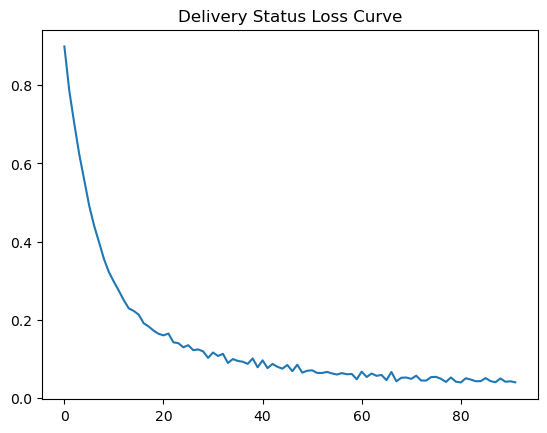

In [142]:
plt.plot(model.loss_curve_)
plt.title('Delivery Status Loss Curve')

Text(0.5, 1.0, 'Delivery Status Validation Scores')

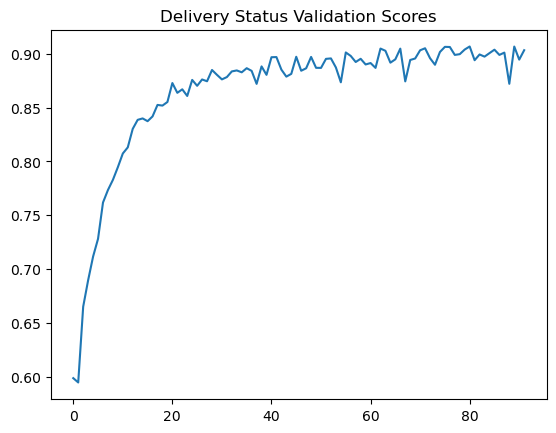

In [143]:
plt.plot(model.validation_scores_)
plt.title('Delivery Status Validation Scores')

In [97]:
model.n_features_in_

6732

In [98]:
model.n_iter_

92

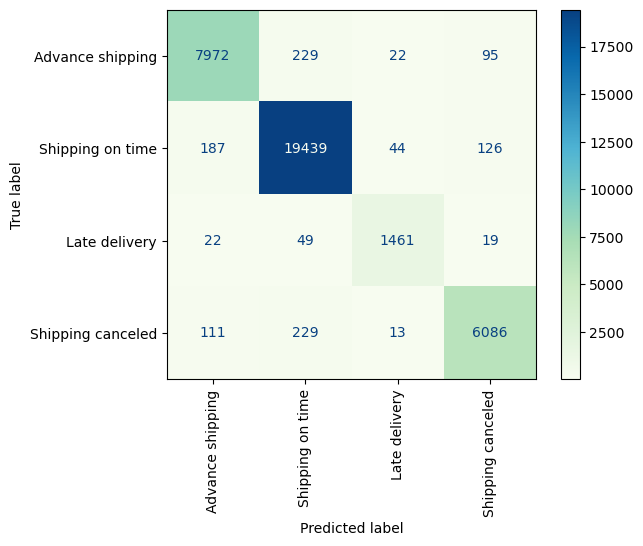

In [153]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=list(df_sample["Delivery Status"].drop_duplicates().values)).plot(cmap="GnBu", xticks_rotation='vertical')

In [156]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.96140859, 0.97458137, 0.9487013 , 0.96206133]),
 array([0.95840346, 0.98196605, 0.94197292, 0.94517782]),
 array([0.95990367, 0.97825978, 0.94532514, 0.95354485]),
 array([ 8318, 19796,  1551,  6439]))

In [127]:
# Save model for future use
import joblib

joblib.dump(model, 'DeliveryStatusModel.pkl')

# Code for reading the model
# model = joblib.load('DeliveryStatusModel.pkl')

['DeliveryStatusModel.pkl']

## MLP 2 (Shipping Time)

Create a MLP regressor for predicting the actual shipping time

In [157]:
## Different X and y combinations
df_sample = df_clean.sample(frac=1.0)

# Using the difference between Days for shipment (scheduled) and days for shipping (real)
X = df_sample.drop(columns=['Delivery Status', 'Days for shipping (real)', 'Order Status'])
y = df_sample["Days for shipping (real)"]

# Scale and handle categorical data
scaler = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), [
        'Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode',
        'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name',
        'Shipping Mode', 'order month', 'order weekday', 'order hour', 'order is weekend'
    ]),
    ('scale', StandardScaler(), [
        'Days for shipment (scheduled)', 'Latitude', 'Longitude', 'Order Item Discount', 'Sales', 'Order Item Total', 
        'Order Profit Per Order', 'Product Price','total order sales', 'total orders in day', 'total order qty'
    ])
], remainder='passthrough')

# scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9, stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=9)


In [101]:
def eval_model(model, X, y):
    # Predict and evaluate
    y_hat = model.predict(X)
    mse = mean_squared_error(y, y_hat)
    r2 = r2_score(y, y_hat)
    return mse, r2

In [103]:

# Set values
hidden_layers = (128, 128, 128, 64, 64, 64)
seed = 23

lrs = [0.0001, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]
# Create MLP Regressor and train
for lr in lrs:
    model2 = MLPRegressor(hidden_layer_sizes=hidden_layers, learning_rate_init=lr, random_state=seed, max_iter=100, early_stopping=True)
    model2.fit(X_train, y_train)

    # Evaluate model
    mse, r2 = eval_model(model2, X_test, y_test)
    #mse_val, r2_val = eval_model(model2, X_val, y_val)
    print(f'Learning rate: {lr}: test MSE: {mse}, test r2: {r2}') #; validation MSE: {mse_val}, validation r2: {r2_val}')

Learning rate: 0.0001: test MSE: 1.585814018609911, test r2: 0.3987097619825688
Learning rate: 0.0005: test MSE: 1.5772480994356406, test r2: 0.4019576860888584
Learning rate: 0.001: test MSE: 1.5217771877871813, test r2: 0.4229904914977698
Learning rate: 0.002: test MSE: 1.5426810722572568, test r2: 0.41506440336826866
Learning rate: 0.003: test MSE: 1.544937094398553, test r2: 0.4142089915265309
Learning rate: 0.004: test MSE: 1.567879809762412, test r2: 0.4055098435684408
Learning rate: 0.005: test MSE: 1.5558264528461336, test r2: 0.41008009314628924
Learning rate: 0.01: test MSE: 1.5612798477941177, test r2: 0.4080123392307635


In [104]:

#Take the best learning rate and train model with different layers
lr = 0.001
hlrs = [(32,32,32),(64,64,64),(128,128,128),(128,128,64,64,32,32),(128,128,128,64,64,64),(128,128,128,64,64,64,32,32,32)]

scores_test_m2 = []
scores_vals_m2 = []

for hlr in hlrs:
    model2 = MLPRegressor(hidden_layer_sizes=hlr, learning_rate_init=lr, random_state=seed, max_iter=100, early_stopping=True)
    model2.fit(X_train, y_train)

    # Evaluate model
    mse, r2 = eval_model(model2, X_test, y_test)
    #mse_val, r2_val = eval_model(model2, X_val, y_val)


    scores_test_m2.append((mse, r2))
    #scores_vals_m2.append((mse_val, r2_val))
    print(f'Layer type and sizes: {hlr}: test MSE: {mse}, test r2: {r2}') #; validation MSE: {mse_val}, validation r2: {r2_val}')

Layer type and sizes: (32, 32, 32): test MSE: 1.58451587374713, test r2: 0.3992019772261993
Layer type and sizes: (64, 64, 64): test MSE: 1.5852843482624812, test r2: 0.39891059613180657
Layer type and sizes: (128, 128, 128): test MSE: 1.516249433731315, test r2: 0.42508644002196505
Layer type and sizes: (128, 128, 64, 64, 32, 32): test MSE: 1.5794075622964143, test r2: 0.4011388864551645
Layer type and sizes: (128, 128, 128, 64, 64, 64): test MSE: 1.5217771877871813, test r2: 0.4229904914977698
Layer type and sizes: (128, 128, 128, 64, 64, 64, 32, 32, 32): test MSE: 1.5848485989504568, test r2: 0.39907581841163786


In [107]:
#Take the best learning rate and layer architecture and try more epochs
lr = 0.001
hlr = (128,128,128)

model2 = MLPRegressor(hidden_layer_sizes=hlr, learning_rate_init=lr, random_state=seed, max_iter=500, early_stopping=True)
model2.fit(X_train, y_train)

# Evaluate model
mse, r2 = eval_model(model2, X_test, y_test)
#mse_val, r2_val = eval_model(model2, X_val, y_val)

print(f'Layer type and sizes: {hlr}: test MSE: {mse}, test r2: {r2}') #; validation MSE: {mse_val}, validation r2: {r2_val}')

Layer type and sizes: (128, 128, 128): test MSE: 0.569020865706757, test r2: 0.7841738440995134


Text(0.5, 1.0, 'Days for shipping (real) Loss Curve')

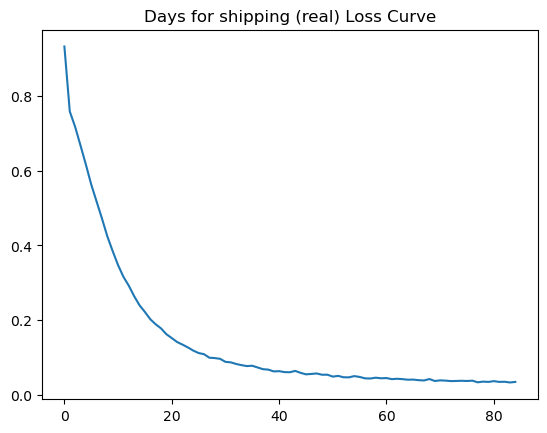

In [147]:
plt.plot(model2.loss_curve_)
plt.title('Days for shipping (real) Loss Curve')

Text(0.5, 1.0, 'Days for shipping (real) Validation Scores')

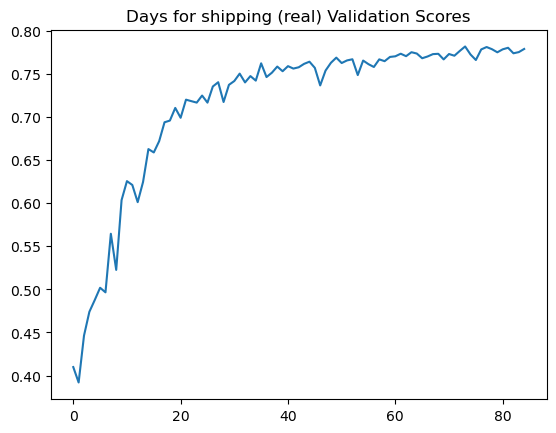

In [148]:
plt.plot(model2.validation_scores_)
plt.title('Days for shipping (real) Validation Scores')

In [66]:
model2.n_iter_

37

In [146]:
model2.n_features_in_

6732

In [130]:
# Save model for future use
import joblib

joblib.dump(model2, 'DeliveryDaysModel.pkl')

# Code for reading the model
# model = joblib.load('DeliveryDaysModel.pkl')

['DeliveryDaysModel.pkl']

## Binary classification late or not late
Regressor but to predict if it will go late or not

In [ ]:
## Different X and y combinations
df_sample = df_clean.sample(frac=0.2)

# Using the difference  Days for shipment (scheduled) and days for shipping (real) (just as 1 if late 0 if in time) aka binary result
X = df_sample.drop(columns=['Delivery Status', 'Days for shipping (real)', 'Order Status'])
y = df_sample["Days for shipment (scheduled)"] - df_sample["Days for shipping (real)"]
y = y.apply(lambda x: 1 if x < 0 else 0) # 1 if late, 0 if in time

# Scale and handle categorical data
scaler = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), [
        'Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode',
        'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name',
        'Shipping Mode', 'order month', 'order weekday', 'order hour', 'order is weekend'
    ]),
    ('scale', StandardScaler(), [
        'Days for shipment (scheduled)', 'Latitude', 'Longitude', 'Order Item Discount', 'Sales', 'Order Item Total',
        'Order Profit Per Order', 'Product Price','total order sales', 'total orders in day', 'total order qty'
    ])
], remainder='passthrough')

# scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=9)

Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from category_encoders import TargetEncoder
import pandas as pd


# Model Initialization (Ensemble methods)
rf_model = RandomForestClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# Define hyperparameters grid for each model
param_grid_rf = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 0.5, 0.75],
    'max_samples': [0.5, 1.0]
}


param_grid_ab = {
    'n_estimators': [50, 100, 200,500,1000],
    'learning_rate': [1, 0.1, 0.01]
}


# Create GridSearchCV for each model
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_ab = GridSearchCV(ab_model, param_grid_ab, cv=5, scoring='accuracy')

# Fit the models with GridSearchCV
grid_rf.fit(X_train, y_train)
grid_ab.fit(X_train, y_train)

# Get best scores and best parameters
best_scores = {
    'Random Forest': grid_rf.best_score_,
    'AdaBoost': grid_ab.best_score_,
}

best_params = {
    'Random Forest': grid_rf.best_params_,
    'AdaBoost': grid_ab.best_params_,
}

# Display best scores and best parameters
print("Best Scores:")
for model, score in best_scores.items():
    print(f"{model}: {score:.4f}")

print("\nBest Parameters:")
for model, params in best_params.items():
    print(f"{model}: {params}")


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

classifiers = {
    'Random Forest': grid_rf.best_estimator_,
    'AdaBoost': grid_ab.best_estimator_
}

for clf_name, clf in classifiers.items():
    y_pred = clf.predict(X_test)
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=clf.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.show()


In [ ]:
# Get feature importances
feature_importances = {
    'Random Forest': grid_rf.best_estimator_.feature_importances_,
    'AdaBoost': grid_ab.best_estimator_.feature_importances_
}

plt.figure(figsize=(12, 6))
for clf_name, importances in feature_importances.items():
    plt.figure()
    sorted_indices = importances.argsort()[::-1][:10]  # Top 10 important features
    plt.barh(range(10), importances[sorted_indices], align='center')
    plt.yticks(range(10), X.columns[sorted_indices])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Feature Importances for {clf_name}')
    plt.show()


SVM

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

def search_best_svm(kernel, C_search_space, random_state):
    best_score = -np.inf
    for C in C_search_space:
        # Initialize an SVM classifier with the specified kernel type, C value, and random state
        ### START CODE ###
        svm_classifier = SVC(kernel=kernel, C=C, random_state=random_state)
        ### END CODE ###

        # Evaluate accuracy scores using 5-fold cross-validation scores
        ### START CODE ###
        cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5)
        ### END CODE ###

        # Compute the average score and compare with the current best score to update the best C
        ### START CODE ###
        score = cv_scores.mean()
        if score>best_score:
            best_score = score
            best_C = C
        ### END CODE ###
        print(f"C: {C} Avg Cross Val Score: {np.round(score, 4)}")

    print(f"Best C: {best_C}")

    # Initialize the model using the specified kernel type, best C, and random state;
    # and then fit the model using training set
    ### START CODE ###
    model = SVC(kernel=kernel, C=best_C, random_state=random_state)
    # Fit the model using the full training set
    model.fit(X_train, y_train)
    ### END CODE ###
    return model, best_C

In [ ]:
C_values = [0.1, 1, 10, 100]

# Train SVM models with different kernels
# linear_model, linear_best_C = search_best_svm(kernel='linear', C_search_space=C_values, random_state=42)
poly_model, poly_best_C = search_best_svm(kernel='poly', C_search_space=C_values, random_state=42)
rbf_model, rbf_best_C = search_best_svm(kernel='rbf', C_search_space=C_values, random_state=42)

#get accuracy scores
# linear_test_accuracy = linear_model.score(X_test, y_test)
poly_test_accuracy = poly_model.score(X_test, y_test)
rbf_test_accuracy = rbf_model.score(X_test, y_test)

# print(f"Linear SVM Test Accuracy: {linear_test_accuracy:.4f}")
print(f"Polynomial SVM Test Accuracy: {poly_test_accuracy:.4f}")
print(f"RBF SVM Test Accuracy: {rbf_test_accuracy:.4f}")


MLP

In [159]:
## Different X and y combinations
df_sample = df_clean.sample(frac=1.0)

# Using the difference  Days for shipment (scheduled) and days for shipping (real) (just as 1 if late 0 if in time) aka binary result
X = df_sample.drop(columns=['Delivery Status', 'Days for shipping (real)', 'Order Status'])
y = df_sample["Days for shipment (scheduled)"] - df_sample["Days for shipping (real)"]
y = y.apply(lambda x: 1 if x < 0 else 0) # 1 if late, 0 if in time

# Scale and handle categorical data
scaler = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), [
        'Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Customer Zipcode',
        'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name',
        'Shipping Mode', 'order month', 'order weekday', 'order hour', 'order is weekend'
    ]),
    ('scale', StandardScaler(), [
        'Days for shipment (scheduled)', 'Latitude', 'Longitude', 'Order Item Discount', 'Sales', 'Order Item Total', 
        'Order Profit Per Order', 'Product Price','total order sales', 'total orders in day', 'total order qty'
    ])
], remainder='passthrough')

# scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9, stratify=y)
#X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=9)

In [111]:
# Set values
hidden_layers = (128, 128, 128, 64,64,64)
seed = 23

# try different learning rates and get their scores
lrs = [0.0001, 0.0008, 0.0009, 0.001, 0.002, 0.003, 0.01]
for lr in lrs:
    model3 = MLPClassifier(hidden_layer_sizes=hidden_layers, learning_rate_init=lr, random_state=seed, max_iter=200, early_stopping=True)

    # Fit the MLPRegressor to training data
    model3.fit(X_train, y_train)

    # Report Model performance
    score_test = model3.score(X_test, y_test)
    #score_val = model3.score(X_val, y_val)

    print(f'Learning rate: {lr}, test score: {score_test}') #, validation score: {score_val}')


Learning rate: 0.0001, test score: 0.7722278644631151
Learning rate: 0.0008, test score: 0.7766134244298772
Learning rate: 0.0009, test score: 0.7863078201458775
Learning rate: 0.001, test score: 0.7803988551380298
Learning rate: 0.002, test score: 0.7795217431446774
Learning rate: 0.003, test score: 0.7801218724032869
Learning rate: 0.01, test score: 0.7740282522389438


In [112]:
#Take the best learning rate and train a model with all data
lr = 0.0009
hlrs = [(32,32,32),(64,64,64),(128,128,128),(128,128,64,64,32,32),(128,128,128,64,64,64),(128,128,128,64,64,64,32,32,32)]

scores_test = []
scores_vals = []

for hlr in hlrs:
    model3 = MLPClassifier(hidden_layer_sizes=hlr, learning_rate_init=lr, random_state=seed, max_iter=150, early_stopping=True)

    # Fit the MLPRegressor to training data
    model3.fit(X_train, y_train)

    # Report Model performance
    score_test = model3.score(X_test, y_test)
    #score_val = model3.score(X_val, y_val)

    scores_test.append(score_test)
    #scores_vals.append(score_val)

    print(f'Layer type and sizes: {hlr}, test score: {score_test}') #, validation score: {score_val}')

Layer type and sizes: (32, 32, 32), test score: 0.7821069153356107
Layer type and sizes: (64, 64, 64), test score: 0.7925399316775921
Layer type and sizes: (128, 128, 128), test score: 0.7862154925676299
Layer type and sizes: (128, 128, 64, 64, 32, 32), test score: 0.783999630689687
Layer type and sizes: (128, 128, 128, 64, 64, 64), test score: 0.7863078201458775
Layer type and sizes: (128, 128, 128, 64, 64, 64, 32, 32, 32), test score: 0.7917089834733635


In [121]:
#Take the best learning rate and layer architecture and try more epochs
lr = 0.001
hlr = (64,64,64)


model3 = MLPClassifier(hidden_layer_sizes=hlr, learning_rate_init=lr, random_state=seed, max_iter=500, early_stopping=True)

# Fit the MLPRegressor to training data
model3.fit(X_train, y_train)

# Report Model performance
score_test = model3.score(X_test, y_test)
#score_val = model3.score(X_val, y_val)

print(f'Layer type and sizes: {hlr}, test score: {score_test}')

Layer type and sizes: (64, 64, 64), test score: 0.9061213184378174


Text(0.5, 1.0, 'Late Delivery Loss Curve')

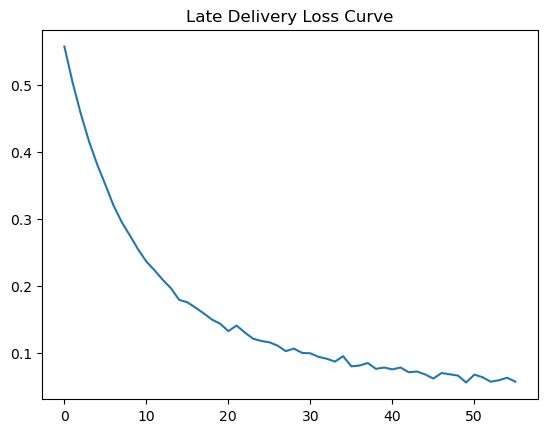

In [149]:
plt.plot(model3.loss_curve_)
plt.title('Late Delivery Loss Curve')

Text(0.5, 1.0, 'Late Delivery Validation Scores')

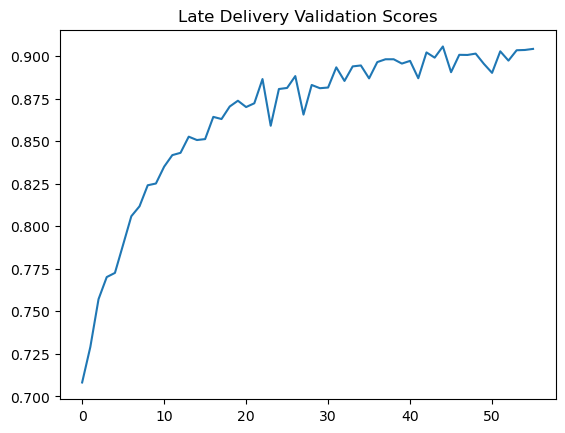

In [150]:
plt.plot(model3.validation_scores_)
plt.title('Late Delivery Validation Scores')

In [124]:
model3.n_iter_

56

In [151]:
model3.n_features_in_

6732

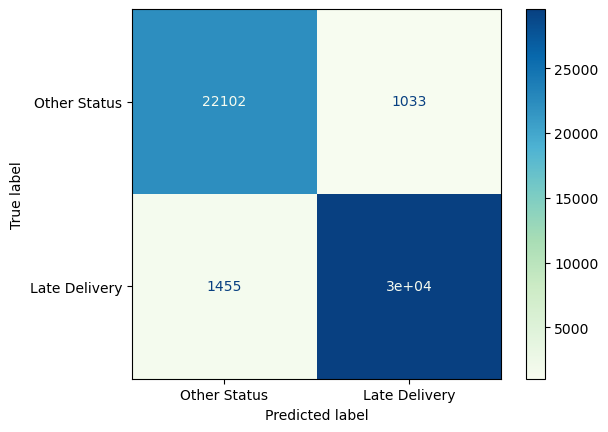

In [160]:
y_pred = model3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm, display_labels=['Other Status', 'Late Delivery']).plot(cmap="GnBu")

In [161]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.93823492, 0.96623962]),
 array([0.95534904, 0.95309478]),
 array([0.94671464, 0.95962219]),
 array([23135, 31020]))

In [131]:
# Save model for future use
import joblib

joblib.dump(model, 'LateDeliveryBinaryModel.pkl')

# Code for reading the model
# model = joblib.load('LateDeliveryBinaryModel.pkl')

['LateDeliveryBinaryModel.pkl']